## Reading and plotting a spectrum

Here we will read and plot a spectrum from the HARPS spectrograph.
Extra headers from the fits files, not included by default in `ACTIN`, will also be extracted.

In [1]:
%matplotlib inline

import matplotlib.pylab as plt

from actin2 import ACTIN
actin = ACTIN()

First we are going to use a fits file provided by `ACTIN` in the ``test`` directory.

In [2]:
import os, glob
files = glob.glob(os.path.join(os.pardir, "actin2/test/HARPS/HD41248", "*_s1d_A.fits"))
print(files)

['../actin2/test/HARPS/HD41248/HARPS.2014-01-24T01:18:06.472_s1d_A.fits', '../actin2/test/HARPS/HD41248/HARPS.2014-01-16T06:24:23.418_s1d_A.fits', '../actin2/test/HARPS/HD41248/HARPS.2014-01-24T04:17:29.213_s1d_A.fits', '../actin2/test/HARPS/HD41248/HARPS.2014-01-21T05:33:32.740_s1d_A.fits', '../actin2/test/HARPS/HD41248/HARPS.2014-01-21T03:16:16.891_s1d_A.fits', '../actin2/test/HARPS/HD41248/HARPS.2014-01-16T05:37:46.157_s1d_A.fits']


Now we read the spectrum by calling the class `actin.ReadSpec` with the file name inside `files` the list. The class ``actin.ReadSpec`` can read one fits file and identify the spectrum to read it automatically.

In [3]:
read_spec = actin.ReadSpec(files[0])

The spectrum data is now stored in `read_spec` which includes dictionaries with the `spectrum`, `headers`, some plotting functions and the `spec` object. The `read_spec.spec` object is a reference to the spectrograph class used to read the file, in this case HARPS. All methods of the `HARPS` class will be available in `read_spec.spec`.

In [4]:
print(read_spec)
print(read_spec.spec)

In [5]:
print(dir(read_spec))
print(dir(read_spec.spec))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'headers', 'plot_bisector', 'plot_ccf', 'plot_spec', 'spec', 'spectrum']
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_deblaze', '_get_snr', '_get_target', '_save_object_data', '_search_file', 'ccf_profile', 'headers', 'spectrum']


The `spectrum`, `headers` and `ccf_profile` methods are dictionaries containing the spectrum, the instrument fits headers, and the CCF profile, respectively.

The spectrum includes the raw (`wave_raw`, `flux_raw`) and the stellar rest frame corrected spectrum (`wave`, `flux`, `flux_err`). Depending on the fits files loaded, the `raw` data could be the same as the 'final' data (e.g. if the flux is already deblazed, as is generally the case for the 1d files).

In [6]:
spectrum = read_spec.spectrum
print(spectrum.keys())
print(spectrum['wave'])
print(spectrum['wave_raw'])

dict_keys(['wave_raw', 'flux_raw', 'wave', 'flux', 'flux_err'])
[3781.50553121 3781.51553109 3781.52553098 ... 6912.68870992 6912.6987098
 6912.70870968]
[3781.55 3781.56 3781.57 ... 6912.77 6912.78 6912.79]


The headers contain selected headers extracted from the fits files.

In [7]:
headers = read_spec.headers
headers

{'obj': 'HD41248',
 'instr': 'HARPS',
 'date_obs': '2014-01-24T01:18:06.471',
 'bjd': 2456681.5586334,
 'drs': 'HARPS_3.7',
 'exptime': 600.0018,
 'ra': 90.136782,
 'dec': -56.16351,
 'snr7': 15.7,
 'snr50': 67.6,
 'prog_id': '190.C-0027(A)',
 'pi_coi': 'Santos',
 'cal_th_err': 0.251928438934471,
 'berv': -2906.50537382529,
 'spec_rv': 3400.0,
 'snr_med': 55.0,
 'ftype': 's1d',
 'rv_flg': 'CCF',
 'rv': 3525.3817390101003,
 'dvrms': 1.07284148378742,
 'ccf_noise': 1.61618716144072,
 'fwhm': 6747.20227395774,
 'cont': 39.2040895675395,
 'ccf_mask': 'G2',
 'drift_noise': 0.086,
 'drift_rv': 0.176,
 'rv_wave_corr': 3525.3817390101003,
 'rv_err': 1.6379636379205038,
 'spec_flg': 'OK',
 'file': 'HARPS.2014-01-24T01:18:06.472_s1d_A.fits'}

New headers can be added using the `add_spec_hdrs` option.
For example, to extract also the SNR at order 20:

In [8]:
read_spec = actin.ReadSpec(files[0], 
    add_spec_hdrs=dict(snr20='HIERARCH ESO DRS SPE EXT SN50'))

print("SNR20 =", read_spec.headers['snr20'])

SNR20 = 67.6


To see the spectrum we can call the `plot` method to plot the full spectrum. If the file was a 2D spectrum, we could have used the `order` option in the `plot` method to select the order to plot. The option ```show=False``` can be used to produce the plot without calling `plt.show()` so the plot can be used afterwards.

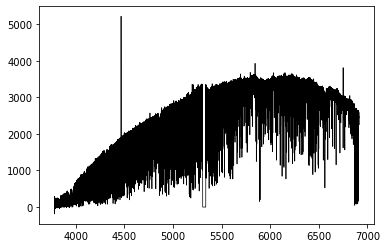

In [9]:
read_spec.plot_spec(order=66, show=True, c='k', lw=0.7)

The `plot` method accepts keywords used in `matplotlib.pylab.plot` so the plot parameters can be changed easily.

We can compare the spectrum at the star's rest frame (the one plotted above) with the unshifted spectrum in the zone of the H$\alpha$ line:

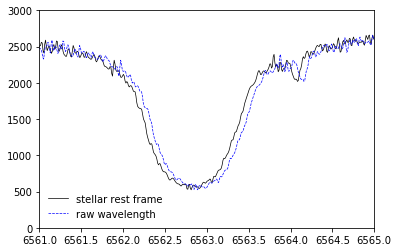

In [10]:
read_spec.plot_spec(show=False, lw=0.7, c='k', label='stellar rest frame')
read_spec.plot_spec(key_wave='wave_raw', ls='--', show=False, lw=0.7, c='b', label='raw wavelength')
plt.xlim(6561, 6565)
plt.ylim(0, 3000)
plt.legend(frameon=False, loc=3)
plt.show()